# Python for Data Analysis

Manipulating, processing, cleaning, and crunching data in Python.

## Preliminaries

Essential Python Libraries

1. NumPy (**Num**erical **Py**thon)
2. pandas
3. matplotlib
4. IPython
5. SciPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Introductory Examples

General tasks

1. Interacting with the outside world: Reading and writing with a variety of file formats and databases.
2. Preparation: Cleaning, munging, combining, normalizing, reshaping, slicing, and dicing, and transforming data.
3. Transformation: Applying mathematical and statistical operations.
4. Modeling and Computation: Connecting your data to statistical models, machine learning.
5. Presentation: Creating interactive or static graphical visualisations.

### usa.gov dataset

In [2]:
data_path = 'data/usagov_bitly_data2012-03-16-1331923249.txt'
open(data_path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json

with open(data_path, 'r') as data_file:
    records = [json.loads(line) for line in data_file]

In [4]:
len(records)

3560

In [5]:
type(records)

list

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in pure Python

In [7]:
type(records[0])

dict

In [8]:
records[0].keys()

[u'a',
 u'c',
 u'nk',
 u'tz',
 u'gr',
 u'g',
 u'h',
 u'cy',
 u'l',
 u'al',
 u'hh',
 u'r',
 u'u',
 u't',
 u'hc',
 u'll']

In [9]:
time_zones = [record['tz'] for record in records if 'tz' in record]

In [10]:
len(time_zones)

3440

In [11]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
from collections import Counter
time_zone_counter = Counter(time_zones)
time_zone_counter

Counter({u'': 521,
         u'Africa/Cairo': 3,
         u'Africa/Casablanca': 1,
         u'Africa/Ceuta': 2,
         u'Africa/Johannesburg': 1,
         u'Africa/Lusaka': 1,
         u'America/Anchorage': 5,
         u'America/Argentina/Buenos_Aires': 1,
         u'America/Argentina/Cordoba': 1,
         u'America/Argentina/Mendoza': 1,
         u'America/Bogota': 3,
         u'America/Caracas': 1,
         u'America/Chicago': 400,
         u'America/Chihuahua': 2,
         u'America/Costa_Rica': 1,
         u'America/Denver': 191,
         u'America/Edmonton': 6,
         u'America/Guayaquil': 2,
         u'America/Halifax': 4,
         u'America/Indianapolis': 20,
         u'America/La_Paz': 1,
         u'America/Lima': 1,
         u'America/Los_Angeles': 382,
         u'America/Managua': 3,
         u'America/Mazatlan': 1,
         u'America/Mexico_City': 15,
         u'America/Monterrey': 1,
         u'America/Montevideo': 1,
         u'America/Montreal': 9,
         u'America/N

In [13]:
sorted_time_zone_counter = time_zone_counter.most_common()

In [14]:
sorted_time_zone_counter

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33),
 (u'Europe/Berlin', 28),
 (u'Europe/Rome', 27),
 (u'America/Rainy_River', 25),
 (u'Europe/Amsterdam', 22),
 (u'America/Phoenix', 20),
 (u'America/Indianapolis', 20),
 (u'Europe/Warsaw', 16),
 (u'America/Mexico_City', 15),
 (u'Europe/Paris', 14),
 (u'Europe/Stockholm', 14),
 (u'America/Vancouver', 12),
 (u'Pacific/Auckland', 11),
 (u'Europe/Moscow', 10),
 (u'Asia/Hong_Kong', 10),
 (u'America/Puerto_Rico', 10),
 (u'Europe/Helsinki', 10),
 (u'Europe/Prague', 10),
 (u'Europe/Oslo', 10),
 (u'Asia/Calcutta', 9),
 (u'Asia/Istanbul', 9),
 (u'America/Montreal', 9),
 (u'Europe/Lisbon', 8),
 (u'Europe/Athens', 6),
 (u'America/Edmonton', 6),
 (u'Chile/Continental', 6),
 (u'Asia/Bangkok', 6),
 (u'Australia/NSW', 6),
 (u'Europe/Vienna', 6),
 (u'

### Counting Time Zones in pandas

In [15]:
df = pd.DataFrame(records)

In [16]:
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [17]:
df.tz.value_counts().head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [18]:
clean_tz = df.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [19]:
tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

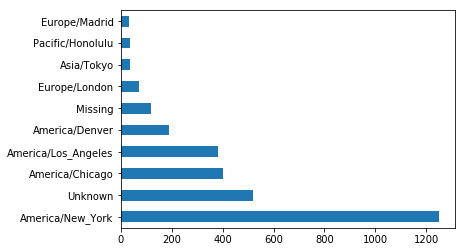

In [20]:
tz_counts.head(10).plot(kind='barh')

In [21]:
df.shape

(3560, 18)

In [22]:
clean_df = df[df.a.notnull()]
clean_df.shape

(3440, 18)

In [23]:
operating_system = np.where(clean_df.a.str.contains('Windows'), 'Windows', 'Not Windows')
operating_system

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], 
      dtype='|S11')

In [24]:
operating_system.shape

(3440,)

### MovieLens 1M Data Set

In [25]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/ml-1m/users.dat', delimiter='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', delimiter='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ml-1m/movies.dat', delimiter='::', header=None, names=mnames, engine='python')

In [26]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [27]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [28]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [30]:
data.dtypes

user_id        int64
movie_id       int64
rating         int64
timestamp      int64
gender        object
age            int64
occupation     int64
zip           object
title         object
genres        object
dtype: object

In [31]:
data.loc[0, :]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [32]:
data.columns

Index([u'user_id', u'movie_id', u'rating', u'timestamp', u'gender', u'age',
       u'occupation', u'zip', u'title', u'genres'],
      dtype='object')

In [33]:
data.loc[0, 'user_id']

1

In [34]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [35]:
ratings_by_title = data.groupby('title').size().sort_values(ascending=False)
ratings_by_title.head()

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
dtype: int64

In [36]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles.size

1216

In [37]:
mean_ratings = mean_ratings.loc[active_titles, :]
mean_ratings.head()

gender,F,M
title,,
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197


In [38]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [39]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings.head()

gender,F,M,diff
title,,,
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Jurassic Park (1993),3.579407,3.814197,0.234791


In [40]:
mean_ratings.sort_values(by='diff', ascending=False).head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [41]:
rating_std_by_title = data.groupby('title').rating.std()
rating_std_by_title.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [42]:
rating_std_by_title.loc[active_titles].sort_values(ascending=False).head()

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Name: rating, dtype: float64

###  US Baby Names 1880-2010

In [43]:
data_path = 'data/names/yob2015.txt'
names2015 = pd.read_csv(data_path, names=['name', 'sex', 'births'])
names2015.head()

,name,sex,births
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504


In [44]:
names2015.groupby('sex').births.sum()

sex
F    1769325
M    1898858
Name: births, dtype: int64

In [45]:
pieces = []

years = range(1880, 2016)
col_names = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=col_names)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [46]:
names.shape

(1858689, 4)

In [47]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


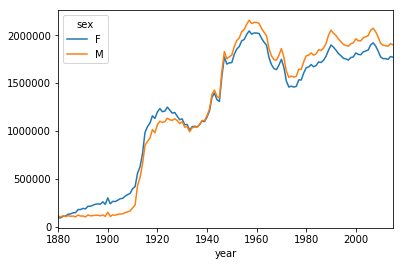

In [48]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot()

## IPython: An Interactive Computing and Development Environment

Key features

1. Tab Completion
2. Introspection (?)
3. The %run command
4. Executing code from clipboard (%paste and %cpaste)
5. Magic Commands (%timeit)

### Qt-based Rich GUI Console

$ ipython qtconsole --pylab=inline

### Matplotlib Integration and Pylab Mode

$ ipython --pylab

### Input and Output variables

The previous two outputs are stored in the _ (one underscore) and __ (two underscores) variables, respectively.
Input variables are stored in variables named like _iX, where X is the input line number

### Logging the input and output

IPython is capable of logging the entire console session including input and output. Logging is turned on by typing %logstart.

Companion functions %logoff, %logon, %logstate, and %logstop.

## Interacting with the Operating System

One can perform most standard command line actions as you would in the Windows or UNIX (Linux, OS X) shell without having to exit IPython. This includes executing shell commands, changing directories, and storing the results of a command in a Python object (list or string).

### Shell command and aliases

Starting a line in IPython with an exclamation point !, or bang, tells IPython to execute everything after the bang in the system shell.

In [49]:
!ls

Data analysis in Python with pandas.ipynb  README.md
LICENSE					   data
Learning Spark.ipynb			   derby.log
Python for Data Analysis.ipynb		   metastore_db


The %alias magic function can define custom shortcuts for shell commands.

In [50]:
%alias ll ls -l

In [51]:
ll /usr

total 60
dr-xr-xr-x  2 root root 12288 Jan 22 15:50 bin
drwxr-xr-x  2 root root  4096 Nov  5 15:38 etc
drwxr-xr-x  2 root root  4096 Nov  5 15:38 games
drwxr-xr-x 50 root root  4096 Jan 22 15:50 include
dr-xr-xr-x 25 root root  4096 Jan 22 15:50 lib
dr-xr-xr-x 38 root root 12288 Jan 22 15:50 lib64
drwxr-xr-x 13 root root  4096 Jan 22 15:50 libexec
drwxr-xr-x 26 root root  4096 Jan 22 16:00 local
dr-xr-xr-x  2 root root  4096 Jan 22 15:50 sbin
drwxr-xr-x 83 root root  4096 Jan 22 15:50 share
drwxr-xr-x  5 root root  4096 Dec 14 14:57 src
lrwxrwxrwx  1 root root    10 Dec 14 14:57 tmp -> ../var/tmp


### Directory Bookmark System

IPython has a simple directory bookmarking system to enable you to save aliases for common directories so that you can jump around very easily.

In [52]:
%bookmark notebooks /usr/local/src/notebooks

In [53]:
cd notebooks

(bookmark:notebooks) -> /usr/local/src/notebooks
/usr/local/src/notebooks


## Software Development Tools

IPython has closely integrated and enhanced the built-in Python pdb debugger. IPython has easy-to-use code timing and profiling tools.

### Interactive Debugger

The %debug command, when entered immediately after an exception, invokes the “post-mortem” debugger and drops you into the stack frame where the exception was raised.

Executing the %pdb command makes it so that IPython automatically invokes the debugger after any exception, a mode that many users will find especially useful.

### Timing Code: %time and %timeit

%time runs a statement once, reporting the total execution time.

In [54]:
strings = ['foo', 'foobar', 'baz', 'qux', 'python', 'Guido Van Rossum'] * 100000 

In [55]:
%time method1 = [x for x in strings if x.startswith('foo')]

CPU times: user 180 ms, sys: 0 ns, total: 180 ms
Wall time: 183 ms


In [56]:
%time method2 = [x for x in strings if x[:3] == 'foo']

CPU times: user 80 ms, sys: 0 ns, total: 80 ms
Wall time: 85.2 ms


To get a more precise measurement, use the %timeit magic function. Given an arbitrary statement, it has a heuristic to run a statement multiple times to produce a fairly accurate average runtime.

In [57]:
%timeit [x for x in strings if x.startswith('foo')]

10 loops, best of 3: 119 ms per loop


In [58]:
%timeit [x for x in strings if x[:3] == 'foo']

10 loops, best of 3: 42.3 ms per loop


### Basic Profiling: %prun and %run -p

Profiling code is closely related to timing code, except it is concerned with determining where time is spent. The main Python profiling tool is the cProfile module, which is not specific to IPython at all. cProfile executes a program or any arbitrary block of code while keeping track of how much time is spent in each function.

In [59]:
# python -m cProfile -s cumulative cprof_example.py

%prun takes the same “command line options” as cProfile but will profile an arbitrary Python statement instead of a while .py file

### Profiling a Function Line-by-Line

%lprun that computes a line-by-line-profiling of one or more functions.

## IPython HTML Notebook

It has a JSON-based .ipynb document format that enables easy sharing of code, output, and figures. The notebook application runs as a lightweight server process on the command line.

## Tips for Productive Code Development Using IPython

1. Reloading Module Dependencies: Python’s “load-once” module system makes it difficult to reflect changes in imported libraries. Use reload(some_lib) and dreload(some_lib) after import statement.
2. Keep relevant objects and data alive
3. Flat is better than nested
4. Overcome a fear of longer files

## Advanced IPython Features

1. Making Your Own Classes IPython-friendly: IPython takes the string returned by the \__repr\__ magic method (by doing output = repr(obj)) and prints that to the console. Thus, we can add a simple \__repr\__ method to the above class to get a more helpful output

## Profiles and Configuration

All of these configuration options are specified in a special ipython_config.py file which will be found in the ~/.config/ipython/ directory on UNIX-like systems and %HOME %/.ipython/ directory on Windows.

# NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis.

Features:

1. ndarray, a fast and space-efficient multidimensional array providing vectorized arithmetic operations and sophisticated broadcasting capabilities
2. Standard mathematical functions for fast operations on entire arrays of data without having to write loops
3. Tools for reading/writing array data to disk and working with memory-mapped files
4. Linear algebra, random number generation, and Fourier transform capabilities
5. Tools for integrating code written in C, C++, and Fortran

## The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large data sets in Python. An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array

### Creating ndarrays

In [60]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)

arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [61]:
arr1.shape

(5,)

In [62]:
arr1.dtype

dtype('float64')

In [63]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [64]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

### Operations between Arrays and Scalars

Arrays are important because they enable you to express batch operations on data without writing any for loops. This is usually called vectorization.

### Basic Indexing and Slicing

In [65]:
arr = np.zeros((2, 2, 2))
arr[:1, :1, :1]

array([[[ 0.]]])

### Boolean indexing

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [67]:
data[names == "Bob", :]

array([[-0.35005798,  1.23133776, -0.50146386, -0.94850851],
       [-0.17489736,  0.26607805,  0.92171919, -0.21451063]])

Note: The Python keywords and and or do not work with boolean arrays.

### Fancy indexing

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order

### Transposing Arrays and Swapping Axes

In [68]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [69]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [70]:
arr.transpose((1, 0))

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## Universal Functions: Fast Element-wise Array Functions

A universal function, or ufunc, is a function that performs elementwise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple elementwise transformations, like sqrt or exp

## Data Processing Using Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as vectorization.

### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y

### Mathematical and Statistical Methods

A set of mathematical functions which compute statistics about an entire array or about the data along an axis are accessible as array methods. Aggregations (often called reductions) like sum, mean, and standard deviation std can either be used by calling the array instance method or using the top level NumPy function

### Methods for Boolean Arrays

In [71]:
arr = np.random.randn(100)
(arr > 0).sum()

48

In [72]:
bools = np.array([False, False, True, False])

In [73]:
bools.any()

True

In [74]:
bools.all()

False

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place using the sort method. Multidimensional arrays can have each 1D section of values sorted in-place along an axis by passing the axis number to sort. The top level method np.sort returns a sorted copy of an array instead of modifying the array in place. 

### Unique and Other Set Logic

np.unique returns the sorted unique values in an array.

## File Input and Output with Arrays

### Storing Arrays on Disk in Binary Format

np.save and np.load are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy.

### Saving and Loading Text Files

np.loadtxt and np.genfromtxt are two functions to load data into vanilla NumPy arrays.

## Linear Algebra

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood using the same industry-standard Fortran libraries used in other languages like MATLAB and R, such as like BLAS, LA- PACK, or possibly (depending on your NumPy build) the Intel MKL

## Random Number Generation

The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.

# Getting started with pandas

In [1]:
import pandas as pd
from pandas import Series, DataFrame

## Introduction to pandas Data Structures

### Series

A Series is a one-dimensional array-like object containing an array of data (of any NumPy data type) and an associated array of data labels, called its index.

In [2]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

### Dataframe

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series (one for all sharing the same index)

In [3]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


### Index objects

pandas’s Index objects are responsible for holding the axis labels and other metadata (like the axis name or names). Any array or other sequence of labels used when constructing a Series or DataFrame is internally converted to an Index. Index objects are immutable and thus can’t be modified by the user

In [4]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index([u'a', u'b', u'c'], dtype='object')

## Essential Functionality

### Reindexing

reindex is to create a new object with the data conformed to a new index.

In [79]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [80]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

### Dropping entries from an axis

Dropping one or more entries from an axis is easy if you have an index array or list without those entries. 

In [81]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [82]:
obj.drop('c', axis=0)

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, selection, and filtering

Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers.

In [83]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [84]:
obj['b']

1.0

In [85]:
obj.loc['b']

1.0

In [86]:
obj.ix['b']

1.0

In [87]:
obj.iloc[1]

1.0

### Arithmetic and data alignment

One of the most important pandas features is the behavior of arithmetic between objects with different indexes. When adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs.

In [5]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [6]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [7]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [8]:
s1.add(s2, fill_value=0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

### Function application and mapping

In [10]:
import numpy as np

frame = DataFrame(np.random.randn(4, 3), columns=list("bde"), index=["Utah", "Ohio", "Texas", "Oregon"])

In [11]:
np.abs(frame)

,b,d,e
Utah,1.848206,0.123403,0.219217
Ohio,2.802987,0.844892,0.290727
Texas,0.687973,1.716746,1.143104
Oregon,1.481714,1.220571,1.921867


In [13]:
f = lambda x: x.max() - x.min()

In [14]:
frame.apply(f)

b    4.651193
d    1.593344
e    1.702650
dtype: float64

In [16]:
frame.apply(f, axis=1)

Utah      2.067423
Ohio      2.512260
Texas     1.028774
Oregon    3.403581
dtype: float64

### Sorting and ranking

In [17]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])

In [18]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [19]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [20]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [23]:
frame.sort_values('b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


### Axis indexes with duplicate values

Up until now all of the examples I’ve showed you have had unique axis labels (index values). While many pandas functions (like reindex ) require that the labels be unique, it’s not mandatory.

In [24]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [25]:
obj['a']

a    0
a    1
dtype: int64

## Summarizing and Computing Descriptive Statistics

In [35]:
df = DataFrame(np.random.randn(4, 3), index=list("abcd"), columns=list("efg"))

In [36]:
df.sum()

e    2.429096
f   -0.546991
g    1.092330
dtype: float64

In [37]:
df.sum(axis=1)

a    0.828636
b    1.196924
c   -0.451114
d    1.399989
dtype: float64

In [38]:
df.mean()

e    0.607274
f   -0.136748
g    0.273082
dtype: float64

In [39]:
df.describe()

,e,f,g
count,4.000000,4.000000,4.000000
mean,0.607274,-0.136748,0.273082
std,0.256833,0.745186,0.873079
min,0.260450,-0.901977,-0.333242
25%,0.495393,-0.509237,-0.321121
50%,0.662873,-0.259593,-0.049811
75%,0.774754,0.112896,0.544392
max,0.842899,0.874171,1.525194


### Correlation and Covariance

In [40]:
df = DataFrame(np.random.randn(4, 3), index=list("0123"), columns=list("abc"))

In [41]:
df

,a,b,c
0,-0.905641,1.609704,1.191921
1,0.321350,-0.215985,0.462305
2,-1.888820,-0.470837,0.391887
3,-0.078163,0.249111,-0.538326


In [42]:
df.corr()

,a,b,c
a,1.000000,0.033143,-0.320623
b,0.033143,1.000000,0.536523
c,-0.320623,0.536523,1.000000


In [44]:
df.cov()

,a,b,c
a,0.956650,0.030051,-0.222441
b,0.030051,0.859382,0.352797
c,-0.222441,0.352797,0.503139


### Unique Values, Value Counts, and Membership

In [45]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [46]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [47]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [48]:
obj.isin(['b', 'c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

## Handling Missing Data

pandas uses the floating point value NaN (Not a Number) to represent missing data in both floating as well as in non-floating point arrays. It is just used as a sentinel that can be easily detected.

In [49]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [50]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

### Filtering Out Missing Data

In [53]:
from numpy import nan as NA

data = Series([1, NA, 3.5, NA, 7])

data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

### Filling in Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the fillna method is the workhorse function to use. Calling fillna with a constant replaces missing values with that value.

In [57]:
data.fillna(0)

0    1.0
1    0.0
2    3.5
3    0.0
4    7.0
dtype: float64

## Hierarchical Indexing

Hierarchical indexing is an important feature of pandas enabling you to have multiple (two or more) index levels on an axis. Somewhat abstractly, it provides a way for you to work with higher dimensional data in a lower dimensional form.

In [58]:
data = Series(np.random.randn(10), index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])

In [59]:
data

a  1    1.967507
   2    0.716929
   3   -0.398615
b  1    0.504018
   2    2.247966
   3   -0.610748
c  1   -0.595969
   2   -1.579997
d  2    0.087106
   3    0.059669
dtype: float64

In [60]:
data.index

MultiIndex(levels=[[u'a', u'b', u'c', u'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

### Reordering and Sorting Levels

In [61]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])

In [66]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']

In [67]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [68]:
frame.swaplevel("key1", "key2")

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [69]:
frame.swaplevel(0, 1).sortlevel(0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Summary Statistics by Level

In [70]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

### Using a DataFrame’s Columns

In [71]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})

In [73]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [72]:
frame.set_index(['c', 'd'])

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

## Other pandas Topics

1. Integer Indexing: To keep things consistent, if you have an axis index containing indexers, data selection with integers will always be label-oriented. This includes slicing with ix.
2. Panel Data: Panel data structure can think of as a three-dimensional analogue of DataFrame.

# Data Loading, Storage, and File Formats

Input and output typically falls into a few main categories: reading text files and other more efficient on-disk formats, loading data from databases, and interacting with network sources like web APIs.

## Reading and Writing Data in Text Format

pandas features a number of functions for reading tabular data as a DataFrame object. read_csv and read_table are likely the ones you’ll use the most. The options for these functions fall into a few categories:

1. Indexing: can treat one or more columns as the returned DataFrame, and whether to get column names from the file, the user, or not at all.
2. Type inference and data conversion: this includes the user-defined value conversions and custom list of missing value markers.
3. Datetime parsing: includes combining capability, including combining date and time information spread over multiple columns into a single column in the result.
4. Iterating: support for iterating over chunks of very large files.
5. Unclean data issues: skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.

Type inference is one of the more important features of these functions; that means you don’t have to specify which columns are numeric, integer, boolean, or string.

### Reading Text Files in Pieces

When processing very large files or figuring out the right set of arguments to correctly process a large file, you may only want to read in a small piece of a file or iterate through smaller chunks of the file.

If you want to only read out a small number of rows (avoiding reading the entire file), specify that with nrows.

### Writing Data Out to Text Format

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file. Series also has a to_csv method.

### Manually Working with Delimited Formats

Most forms of tabular data can be loaded from disk using functions like pandas.read_table . In some cases, however, some manual processing may be necessary. It’s not uncommon to receive a file with one or more malformed lines that trip up read_table. For any file with a single-character delimiter, you can use Python’s built-in csv module.
To use it, pass any open file or file-like object to csv.reader.

### JSON Data

JSON (short for JavaScript Object Notation) has become one of the standard formats for sending data by HTTP request between web browsers and other applications. It is a much more flexible data format than a tabular text form like CSV.

In [76]:
obj = """{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 25, "pet": "Zuko"},
{"name": "Katie", "age": 33, "pet": "Cisco"}]
}"""

In [77]:
obj

'{"name": "Wes",\n"places_lived": ["United States", "Spain", "Germany"],\n"pet": null,\n"siblings": [{"name": "Scott", "age": 25, "pet": "Zuko"},\n{"name": "Katie", "age": 33, "pet": "Cisco"}]\n}'

JSON is very nearly valid Python code with the exception of its null value null and some other nuances (such as disallowing trailing commas at the end of lists). The basic types are objects (dicts), arrays (lists), strings, numbers, booleans, and nulls. All of the keys in an object must be strings. There are several Python libraries for reading and writing JSON data. I’ll use json here as it is built into the Python standard library. To convert a JSON string to Python form, use json.loads.

json.dumps on the other hand converts a Python object back to JSON

### XML and HTML: Web Scraping

Python has many libraries for reading and writing data in the ubiquitous HTML and XML formats. lxml (http://lxml.de) is one that has consistently strong performance in parsing very large files. lxml has multiple programmer interfaces; first I’ll show using lxml.html for HTML, then parse some XML using lxml.objectify.

## Binary Data Formats

One of the easiest ways to store data efficiently in binary format is using Python’s built-in pickle serialization. Conveniently, pandas objects all have a save method which writes the data to disk as a pickle.

You read the data back into Python with pandas.load , another pickle convenience function.

### Using HDF5 Format

There are a number of tools that facilitate efficiently reading and writing large amounts of scientific data in binary format on disk. A popular industry-grade library for this is HDF5, which is a C library with interfaces in many other languages like Java, Python, and MATLAB. The “HDF” in HDF5 stands for hierarchical data format. Each HDF5 file contains an internal file system-like node structure enabling you to store multiple datasets and supporting metadata. Compared with simpler formats, HDF5 supports on-the-fly compression with a variety of compressors, enabling data with repeated patterns to be stored more efficiently. For very large datasets that don’t fit into memory, HDF5 is a good choice as you can efficiently read and write small sections of much larger arrays.

There are not one but two interfaces to the HDF5 library in Python, PyTables and h5py, each of which takes a different approach to the problem. h5py provides a direct, but high-level interface to the HDF5 API, while PyTables abstracts many of the details of HDF5 to provide multiple flexible data containers, table indexing, querying capability, and some support for out-of-core computations.

### Reading Microsoft Excel Files

pandas also supports reading tabular data stored in Excel 2003 (and higher) files using the ExcelFile class. Interally ExcelFile uses the xlrd and openpyxl packages, so you may have to install them first. To use ExcelFile , create an instance by passing a path to an xls or xlsx file.

## Interacting with HTML and Web APIs

Many websites have public APIs providing data feeds via JSON or some other format. There are a number of ways to access these APIs from Python; one easy-to-use method that I recommend is the requests package (http://docs.python-requests.org).

## Interacting with Databases

In many applications data rarely comes from text files, that being a fairly inefficient way to store large amounts of data. SQL-based relational databases (such as SQL Server, PostgreSQL, and MySQL) are in wide use, and many alternative non-SQL (so-called NoSQL) databases have become quite popular. The choice of database is usually dependent on the performance, data integrity, and scalability needs of an application. 

Loading data from SQL into a DataFrame is fairly straightforward, and pandas has some functions to simplify the process. As an example, I’ll use an in-memory SQLite database using Python’s built-in sqlite3 driver.

### Storing and Loading Data in MongoDB

pymongo is the official driver for MongoDB. Documents stored in MongoDB are found in collections inside databases. Each running instance of the MongoDB server can have multiple databases, and each database can have multiple collections.

# Data Wrangling: Clean, Transform, Merge, Reshape

Much of the programming work in data analysis and modeling is spent on data preparation: loading, cleaning, transforming, and rearranging. Sometimes the way that data is stored in files or databases is not the way you need it for a data processing application. Many people choose to do ad hoc processing of data from one form to another using a general purpose programming, like Python, Perl, R, or Java, or UNIX text processing tools like sed or awk.

## Combining and Merging Data Sets

Data contained in pandas objects can be combined together in a number of built-in ways:

1. pandas.merge connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
2. pandas.concat glues or stacks together objects along an axis.
3. combine_first instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

### Database-style DataFrame Merges

Merge or join operations combine data sets by linking rows using one or more keys. These operations are central to relational databases. The merge function in pandas is the main entry point for using these algorithms on your data.

In [79]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})

df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})

In [80]:
df1.merge(df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [81]:
pd.merge(df1, df2, on="key")

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


By default merge does an 'inner' join; the keys in the result are the intersection. Other possible options are 'left' , 'right' , and 'outer'.

### Merging on Index

In some cases, the merge key or keys in a DataFrame will be found in its index. In this case, you can pass left_index=True or right_index=True (or both) to indicate that the index should be used as the merge key.

### Concatenating Along an Axis

Another kind of data combination operation is alternatively referred to as concatenation, binding, or stacking. NumPy has a concatenate function for doing this with raw NumPy arrays.

In [82]:
arr = np.arange(12).reshape((3, 4))

In [86]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

### Combining Data with Overlap

Another data combination situation can’t be expressed as either a merge or concatenation operation. You may have two datasets whose indexes overlap in full or part.

In [87]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])

b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])

In [88]:
b[-1] = np.nan

In [89]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [90]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

## Reshaping and Pivoting

There are a number of fundamental operations for rearranging tabular data. These are alternatingly referred to as reshape or pivot operations.

### Reshaping with Hierarchical Indexing

Hierarchical indexing provides a consistent way to rearrange data in a DataFrame. There are two primary actions:

1. stack : this “rotates” or pivots from the columns in the data to the rows
2. unstack : this pivots from the rows into the columns

In [96]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))

In [97]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [98]:
data.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

### Pivoting “long” to “wide” Format

Note that pivot is just a shortcut for creating a hierarchical index using set_index and reshaping with unstack.

## Data Transformation

### Removing Duplicates

In [99]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

In [100]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [102]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [103]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


### Transforming Data Using a Function or Mapping

In [3]:
import numpy as np
import pandas as pd
from pandas import *

data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [4]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [5]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

In [6]:
data["animal"] = data["food"].map(str.lower).map(meat_to_animal)

In [7]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Renaming Axis Indexes

In [10]:
data.columns.map(str.upper)

array(['FOOD', 'OUNCES', 'ANIMAL'], dtype=object)

In [12]:
data.rename(columns=str.upper)

,FOOD,OUNCES,ANIMAL
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Discretization and Binning

Continuous data is often discretized or otherwised separated into “bins” for analysis.

In [13]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [14]:
bins = [18, 25, 35, 60, 100]

In [15]:
cats = pd.cut(ages, bins)

In [16]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [18]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [19]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

### Detecting and Filtering Outliers

In [20]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))

In [21]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [22]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


### Permutation and Random Sampling

In [25]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

In [28]:
sampler = np.random.permutation(5)
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15
2,8,9,10,11


### Computing Indicator/Dummy Variables

Another type of transformation for statistical modeling or machine learning applications is converting a categorical variable into a “dummy” or “indicator” matrix. If a column in a DataFrame has k distinct values, you would derive a matrix or DataFrame containing k columns containing all 1’s and 0’s.

In [29]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})

In [30]:
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [31]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


## String Manipulation

Python has long been a popular data munging language in part due to its ease-of-use for string and text processing. Most text operations are made simple with the string object’s built-in methods. For more complex pattern matching and text manipulations, regular expressions may be needed. pandas adds to the mix by enabling you to apply string and regular expressions concisely on whole arrays of data, additionally handling the annoyance of missing data.

### String Object Methods

In [37]:
s = 'a,b, guido'

In [38]:
s.split(',')

['a', 'b', ' guido']

In [39]:
[x.strip() for x in s.split(',')]

['a', 'b', 'guido']

In [42]:
','.join(['a', 'b', 'c'])

'a,b,c'

### Regular expressions

In [44]:
import re

text = "foo      bar\t baz \tqux"

In [46]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [47]:
regex = re.compile('\s+')

In [49]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [50]:
regex.findall(text)

['      ', '\t ', ' \t']

Creating a regex object with re.compile is highly recommended if you intend to apply the same expression to many strings; doing so will save CPU cycles.

### Vectorized string functions in pandas

In [52]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

data = Series(data)

In [55]:
data.str.contains("gmail")

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [57]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [59]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

# Plotting and Visualization

It may be a part of the exploratory process; for example, helping identify outliers, needed data transformations, or coming up with ideas for models. matplotlib is a (primarily 2D) desktop plotting package designed for creating publication-quality plots. matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap for mapping and projections.

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline

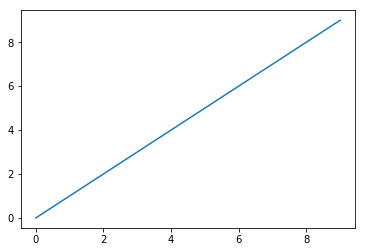

In [61]:
plt.plot(np.arange(10))

## Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure

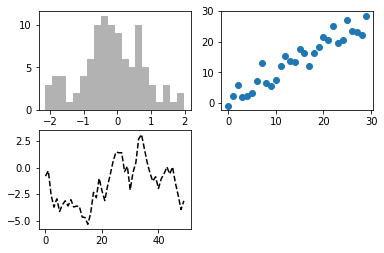

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

### Adjusting the spacing around subplots

The spacing can be most easily changed using the subplots_adjust Figure method. wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

### Colors, Markers, and Line Styles

The pyplot interface, designed for interactive use, consists of methods like xlim, xticks, and xticklabels . These control the plot range, tick locations, and tick labels, respectively. All such methods act on the active or most recently-created AxesSubplot . Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are ax.get_xlim and ax.set_xlim.

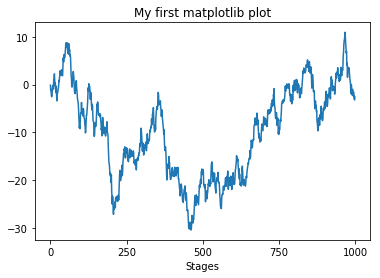

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### Adding legends

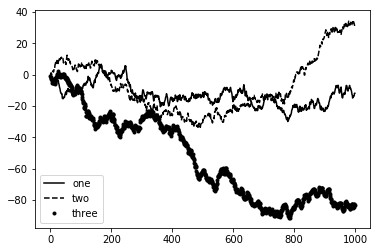

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')